In [20]:
import pandas as pd
import numpy as np
import random

%matplotlib inline

In [9]:
df = pd.read_csv('kepler_lc.csv')

In [10]:
df.head()

,HJD,Detr_Norm_Flux
0,2.454954e+06,1.000140
1,2.454954e+06,1.000083
2,2.454954e+06,0.999972
3,2.454954e+06,1.000087
4,2.454954e+06,1.000077


In [11]:
df.describe()

,HJD,Detr_Norm_Flux
count,2.096000e+03,2096.000000
mean,2.454976e+06,0.999701
std,1.287067e+01,0.001323
min,2.454954e+06,0.992423
25%,2.454966e+06,0.999897
50%,2.454976e+06,0.999968
75%,2.454987e+06,1.000037
max,2.454998e+06,1.000313


In [12]:
df.dtypes


HJD               float64
Detr_Norm_Flux    float64
dtype: object

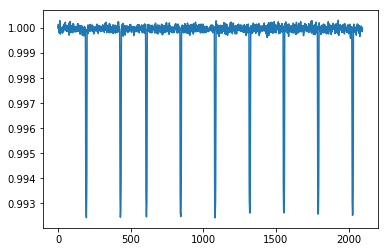

In [13]:
df.Detr_Norm_Flux.plot()

In [32]:
def lose_data(df, perc=.2):
    df_lost = df.copy()
    num_row = int(df.shape[0] * .2)
    for i in range(num_row):
        loc = random.randint(0, df.shape[0]-1)
        df_lost.Detr_Norm_Flux.iloc[loc]=np.nan
    return df_lost

In [33]:
df_lost = lose_data(df)

In [39]:
df_lost.to_csv('kepler_com_falha.csv')

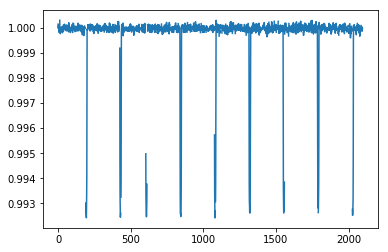

In [34]:
df_lost.Detr_Norm_Flux.plot()

In [38]:
def fill_value(column):
    
    return column.shape
fill_value(df_lost.Detr_Norm_Flux)

(2096,)

In [91]:
col_test = df_lost.Detr_Norm_Flux

In [92]:
missing = col_test.isnull()

In [93]:
different_from_last = missing.diff()

In [94]:
gap_ends = col_test[~missing & different_from_last].index

In [79]:
different_from_last[0] = True #count the start as different from the last

In [95]:
gap_starts = col_test[missing & different_from_last].index -1

In [96]:
df_intervalo = pd.DataFrame(gap_starts, columns=['gap_start'])

In [97]:
df_intervalo['gap_end'] = gap_ends

In [98]:
df_intervalo['gap_size'] = df_intervalo.gap_end - df_intervalo.gap_start -1

In [99]:
df_intervalo.head()

,gap_start,gap_end,gap_size
0,9,11,1
1,12,14,1
2,32,34,1
3,38,41,2
4,42,44,1


In [101]:
df_intervalo = df_intervalo.merge(df_lost, how='left', left_on='gap_start', right_index=True)

In [103]:
df_intervalo.drop(columns=['HJD'], inplace=True)

In [104]:
df_intervalo.rename(columns={'Detr_Norm_Flux':'start_value'}, inplace=True)

In [106]:
df_intervalo = df_intervalo.merge(df_lost, how='left', left_on='gap_end', right_index=True)
df_intervalo.drop(columns=['HJD'], inplace=True)
df_intervalo.rename(columns={'Detr_Norm_Flux':'end_value'}, inplace=True)

In [107]:
df_intervalo['delta'] = df_intervalo.end_value - df_intervalo.start_value

In [108]:
df_intervalo.head()

,gap_start,gap_end,gap_size,start_value,end_value,delta
0,9,11,1,1.000111,0.999988,-0.000123
1,12,14,1,1.000296,0.999898,-0.000398
2,32,34,1,0.999847,0.999906,0.000059
3,38,41,2,1.000103,0.999997,-0.000106
4,42,44,1,1.000061,0.999958,-0.000103


In [109]:
df_intervalo['max'] = df_lost.Detr_Norm_Flux.max()
df_intervalo['min'] = df_lost.Detr_Norm_Flux.min()

In [110]:
df_intervalo.head()

,gap_start,gap_end,gap_size,start_value,end_value,delta,max,min
0,9,11,1,1.000111,0.999988,-0.000123,1.000296,0.992423
1,12,14,1,1.000296,0.999898,-0.000398,1.000296,0.992423
2,32,34,1,0.999847,0.999906,0.000059,1.000296,0.992423
3,38,41,2,1.000103,0.999997,-0.000106,1.000296,0.992423
4,42,44,1,1.000061,0.999958,-0.000103,1.000296,0.992423


In [114]:
def calc_freq(df_intervalo):
    k = int(1. + 3.33 * np.log10(df_intervalo.shape[0]))
    return k
calc_freq(df_intervalo)

9